# Определение перспективного тарифа для телеком компании

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

______

###### Данное исследование разделено на несколько частей.

* [1.  Изучение файла с данными, получение общей информации.](#section1)
* [2. Подготовка данных.](#section2)
* [3. Анализ данных.](#section3)
* [4. Проверка гипотез.](#section4)
* [5. Выводы.](#section5)



<a id='section1'> </a>

## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import numpy as np

In [2]:
calls = pd.read_csv('./datasets/calls.csv')
internet = pd.read_csv('./datasets/internet.csv')
messages = pd.read_csv('./datasets/messages.csv')
tariffs = pd.read_csv('./datasets/tariffs.csv')
users = pd.read_csv('./datasets/users.csv')

**Таблица users (информация о пользователях):**
* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

In [3]:
users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


**Таблица calls (информация о звонках):**
* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

In [5]:
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


**Таблица messages (информация о сообщениях):**
* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

In [7]:
messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [8]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


**Таблица internet (информация об интернет-сессиях):**
* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

In [9]:
internet.head(10)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
5,5,1000_5,399.97,2018-10-02,1000
6,6,1000_6,540.08,2018-09-07,1000
7,7,1000_7,415.70,2018-07-11,1000
8,8,1000_8,505.40,2018-10-08,1000
9,9,1000_9,345.54,2018-09-03,1000


In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


**Таблица tariffs (информация о тарифах):**
* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

In [11]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [12]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


### Выводы
1. Во всех представленных таблицах все данные заполнены (за исключением столбца churn_date в таблице users)
2. В таблице internet есть лишняя колонка Unnamed: 0 которая дублирует индекс. Ее нужно удалить
3. В таблице users колонка с тарифами называется tariff, а в таблице tariffs - tariff_name. Лучше привести одноименные параметри к единому имени

<a id='section2'> </a>

## Шаг 2. Подготовьте данные
### Приведение данных к нужным типам
#### Таблица users

In [13]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [14]:
# изменяем название столбца tariff на tariff_name
users.columns = ['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date', 'tariff_name']

In [15]:
# выведем названия колонок и их текущие типы в виде словаря
users.dtypes.apply(lambda x: x.name).to_dict()

{'user_id': 'int64',
 'age': 'int64',
 'churn_date': 'datetime64[ns]',
 'city': 'object',
 'first_name': 'object',
 'last_name': 'object',
 'reg_date': 'datetime64[ns]',
 'tariff_name': 'object'}

Столбцы churn_date и reg_date уже приведены к типу datetime. Так как возраст всегда является положительным числом и его значение никогда не превышает 255, то для столбца age используем тип uint8. Так как чсло пользователей в выборке мало то для столбца user_id используем тип int16. Столбец tariff_name по своей сути является категориальным. Произведем замену типов в таблице

In [16]:
# заменим типы в таблице по словарю users_type_dict
users_type_dict = {
 'user_id': 'int16',
 'age': 'uint8',
 'churn_date': 'datetime64[ns]',
 'city': 'category',
 'first_name': 'object',
 'last_name': 'object',
 'reg_date': 'datetime64[ns]',
 'tariff_name': 'category'
}

users = users.astype(users_type_dict)

# убедимся что замена прошла так как задумано
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      500 non-null    int16         
 1   age          500 non-null    uint8         
 2   churn_date   38 non-null     datetime64[ns]
 3   city         500 non-null    category      
 4   first_name   500 non-null    object        
 5   last_name    500 non-null    object        
 6   reg_date     500 non-null    datetime64[ns]
 7   tariff_name  500 non-null    category      
dtypes: category(2), datetime64[ns](2), int16(1), object(2), uint8(1)
memory usage: 21.4+ KB


Замена типов помогла сократить память занимаемую таблицей примерно в 1,5 раза

#### Таблица calls

In [17]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [18]:
calls.dtypes.apply(lambda x: x.name).to_dict()

{'id': 'object',
 'call_date': 'datetime64[ns]',
 'duration': 'float64',
 'user_id': 'int64'}

In [19]:
calls_type_dict = {'id': 'object',
 'call_date': 'datetime64[ns]',
 'duration': 'float32',
 'user_id': 'int16'}

calls = calls.astype(calls_type_dict)
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float32       
 3   user_id    202607 non-null  int16         
dtypes: datetime64[ns](1), float32(1), int16(1), object(1)
memory usage: 4.3+ MB


Замена типов помогла сократить память занимаемую таблицей в 1,44 раза

#### Таблица messages

In [20]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [21]:
messages.dtypes.apply(lambda x: x.name).to_dict()

{'id': 'object', 'message_date': 'datetime64[ns]', 'user_id': 'int64'}

In [22]:
messages_type_dict = {'id': 'object', 'message_date': 'datetime64[ns]', 'user_id': 'int16'}

messages = messages.astype(messages_type_dict)
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int16         
dtypes: datetime64[ns](1), int16(1), object(1)
memory usage: 2.1+ MB


Замена типов помогла сократить память занимаемую таблицей в 1,33 раза

#### Таблица internet

In [23]:
# удалим лишний столбец Unnamed: 0 из таблицы
internet = internet.drop('Unnamed: 0', axis=1)
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [24]:
internet.dtypes.apply(lambda x: x.name).to_dict()

{'id': 'object',
 'mb_used': 'float64',
 'session_date': 'datetime64[ns]',
 'user_id': 'int64'}

In [25]:
internet_type_dict = {'id': 'object',
 'mb_used': 'float32',
 'session_date': 'datetime64[ns]',
 'user_id': 'int16'}

internet = internet.astype(internet_type_dict)
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float32       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int16         
dtypes: datetime64[ns](1), float32(1), int16(1), object(1)
memory usage: 3.1+ MB


Удаление  дублирубщего индекс столбца и замена типов помогла сократить память занимаемую таблицей в 1,84 раза

#### Таблица tariffs

In [26]:
tariffs.dtypes.apply(lambda x: x.name).to_dict()

{'messages_included': 'int64',
 'mb_per_month_included': 'int64',
 'minutes_included': 'int64',
 'rub_monthly_fee': 'int64',
 'rub_per_gb': 'int64',
 'rub_per_message': 'int64',
 'rub_per_minute': 'int64',
 'tariff_name': 'object'}

In [27]:
tariffs_type_dict = {'messages_included': 'uint16',
 'mb_per_month_included': 'int32',
 'minutes_included': 'uint16',
 'rub_monthly_fee': 'uint16',
 'rub_per_gb': 'uint16',
 'rub_per_message': 'uint16',
 'rub_per_minute': 'uint16',
 'tariff_name': 'category'
}

tariffs = tariffs.astype(tariffs_type_dict)
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   messages_included      2 non-null      uint16  
 1   mb_per_month_included  2 non-null      int32   
 2   minutes_included       2 non-null      uint16  
 3   rub_monthly_fee        2 non-null      uint16  
 4   rub_per_gb             2 non-null      uint16  
 5   rub_per_message        2 non-null      uint16  
 6   rub_per_minute         2 non-null      uint16  
 7   tariff_name            2 non-null      category
dtypes: category(1), int32(1), uint16(6)
memory usage: 258.0 bytes


В силу малости таблицы tariffs замена типов не отразилась на величине памяти занимаемой таблицей

### Исправление ошибок в данных
#### Анализ длительности звонков

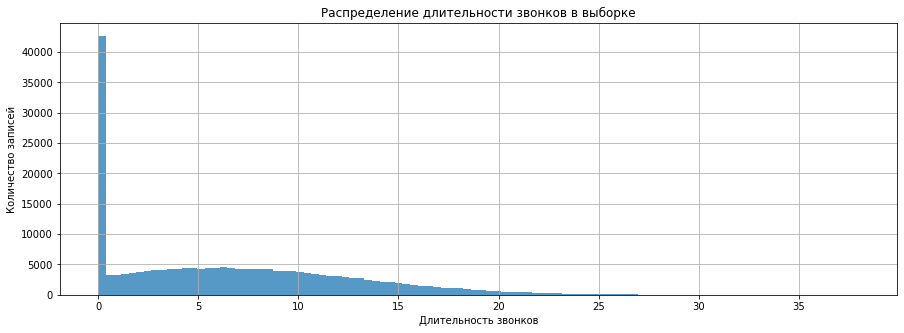

In [28]:
(calls['duration'].hist(bins=100, figsize=(15, 5), alpha = 0.75)
 .set(xlabel='Длительность звонков', 
      ylabel='Количество записей',  
      title='Распределение длительности звонков в выборке'));

In [29]:
calls['duration'].describe()

count    202607.000000
mean          6.755849
std           5.842877
min           0.000000
25%           1.300000
50%           6.000000
75%          10.700000
max          38.000000
Name: duration, dtype: float64

По гистограмме видно, что в области нулевых длительностей имеется большой пик. Скорее всего это связано с тем, что система сотового оператора помимо непосредственно разговоров так же фиксирует пропущенные звонки. Посмотрим на распределение длительности звонков исключив из него нулевые значения

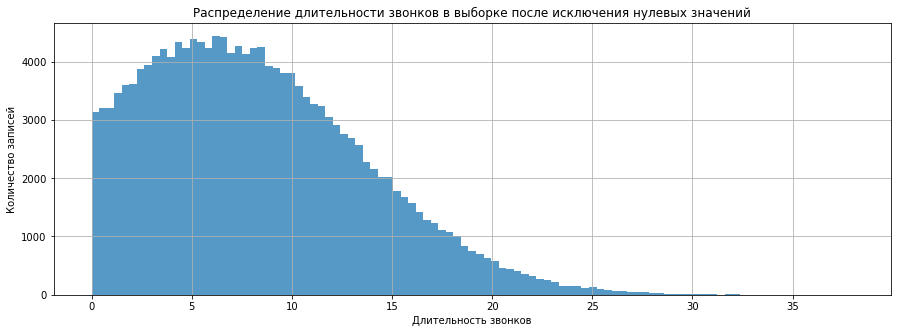

In [30]:
(calls['duration'].drop(calls[calls['duration']==0].index).hist(bins=101, figsize=(15, 5), alpha = 0.75)
 .set(xlabel='Длительность звонков', 
      ylabel='Количество записей',  
      title='Распределение длительности звонков в выборке после исключения нулевых значений'));

In [31]:
calls['duration'].drop(calls[calls['duration']==0].index).describe()

count    162994.000000
mean          8.397747
std           5.352908
min           0.010000
25%           4.170000
50%           7.740000
75%          11.850000
max          38.000000
Name: duration, dtype: float64

После исключения нулевых значений несколько увеличилась средняя продолжительность разговора (8,4 мин против 6,8 мин до исключения нулей) и незначительно снизилось СКО (5,35 мин против 5,84 мин). В виду того, что в конечном счете нас интересует прибыль которую приносит пользователь в течении месяца, то разговоры с нулевой длительностью никак не влияют на нашу целевую переменную. Таким образом разговоры с нулевой длительностью можно из датасета не исключать.

#### Анализ количества отправленных сообщений

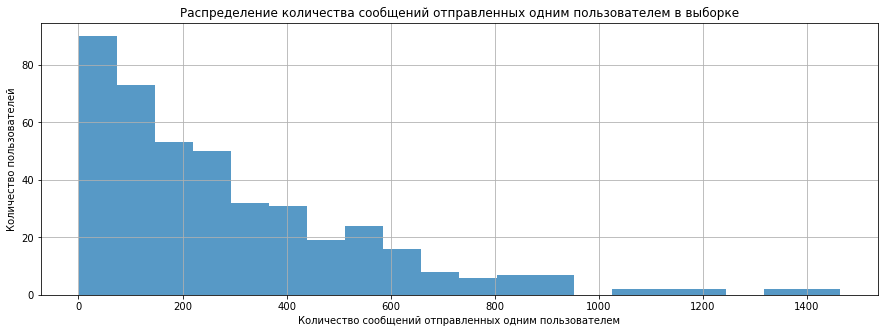

In [32]:
(messages.groupby('user_id')['id'].count().hist(bins=20, figsize=(15, 5), alpha = 0.75)
 .set(xlabel='Количество сообщений отправленных одним пользователем', 
      ylabel='Количество пользователей',  
      title='Распределение количества сообщений отправленных одним пользователем в выборке'));

In [33]:
messages.groupby('user_id')['id'].count().describe()

count     426.000000
mean      288.816901
std       267.607552
min         1.000000
25%        85.750000
50%       215.500000
75%       414.000000
max      1463.000000
Name: id, dtype: float64

В среднем за год один пользователь отправляет 289 сообщений, однако есть отдельные любители общения которые могут отправлять порядка 1400 сообщений в год. 1463 сообщения в год соответсвуют примерно четырем сообщениям в день, что выглядит возможным. Ошибок в таблице с сообщениями не выявлено

#### Анализ объёма потраченного за сессию интернет-трафика

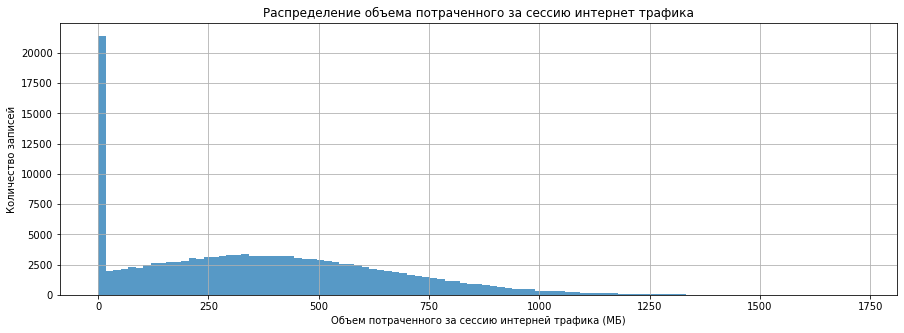

In [34]:
(internet['mb_used'].hist(bins=101, figsize=(15, 5), alpha = 0.75)
 .set(xlabel='Объем потраченного за сессию интерней трафика (МБ)', 
      ylabel='Количество записей',  
      title='Распределение объема потраченного за сессию интернет трафика'));

In [35]:
internet['mb_used'].describe()

count    149396.000000
mean        370.190918
std         278.319153
min           0.000000
25%         138.187496
50%         348.014999
75%         559.552490
max        1724.829956
Name: mb_used, dtype: float64

Как и в случае с длительностью звонков, таблица с потребленным трафиком содержит большое количество записей с нулевым значением. Посмотрим распределение трафика исключив нулевые значения

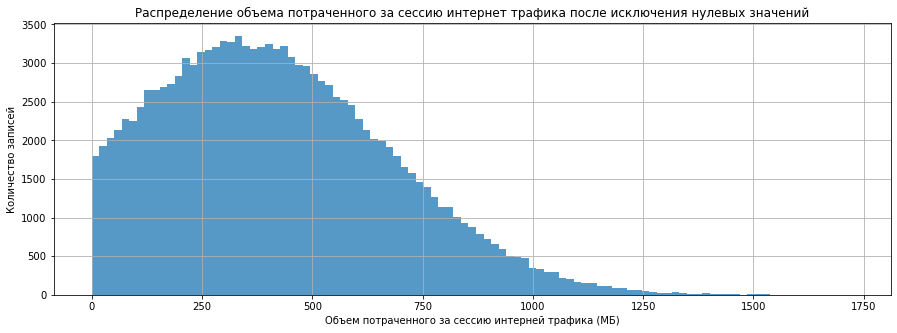

In [36]:
(internet['mb_used'].drop(internet[internet['mb_used']==0].index).hist(bins=101, figsize=(15, 5), alpha = 0.75)
 .set(xlabel='Объем потраченного за сессию интерней трафика (МБ)', 
      ylabel='Количество записей',  
      title='Распределение объема потраченного за сессию интернет трафика после исключения нулевых значений'));

In [37]:
internet['mb_used'].drop(internet[internet['mb_used']==0].index).describe()

count    129798.000000
mean        426.085480
std         255.594391
min           0.030000
25%         227.460007
50%         400.540009
75%         592.947510
max        1724.829956
Name: mb_used, dtype: float64

Как и в случае с длительностью звонков, исключение нулевых значений несколько увеличило величину среднего потребляемого трафика (с 370 МБ до 426 МБ) и незначительно снизило СКО распределения (с 278 МБ до 256 МБ). Поскольку конечной целью исследования является оценка прибыли которую приносит пользователь в течении месяца, то сессии с нулевым трафиком никак не влияют на нашу целевую переменную. Таким образом такие сессии можно из датасета не исключать

<a id='section3'> </a>

## Шаг 3. Проанализируйте данные

* количество сделанных звонков и израсходованных минут разговора по месяцам

In [38]:
# введем в таблицу calls столбец month для последующей группировки по нему
calls['month'] = calls['call_date'].dt.month
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


Так как «Мегалайн» всегда округляет вверх значения минут (если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута), то округлим значения в столбце duration вверх до целых

In [39]:
calls['duration'] = np.ceil(calls['duration']).astype('int32')
calls['duration'].head(10)

0     0
1     0
2     3
3    14
4     6
5     0
6     0
7    19
8    19
9     0
Name: duration, dtype: int32

In [40]:
# сформируем сводную таблицу с учетом звонков нулевой продолжительности
calls_pivot = calls.groupby(['user_id', 'month'])['duration'].agg(['sum', 'count', 'mean'])
# заменим названия столбцов
calls_pivot.columns = ['calls_sum', 'calls_count_with_zero', 'calls_mean_with_zero']

# добавим в сводную таблицу столбец с числом звонков без учета "нулевых" звонков
calls_pivot['calls_count_without_zero'] = (calls.drop(calls[calls['duration']==0].index)
                                     .groupby(['user_id', 'month'])['duration'].agg(['count']))

# добавим в сводную таблицу столбец со средней продолжительностью звонка без учета "нулевых" звонков
calls_pivot['calls_mean_without_zero'] = (calls.drop(calls[calls['duration']==0].index)
                                     .groupby(['user_id', 'month'])['duration'].agg(['mean']))

calls_pivot.head(15)

calls_sum  calls_count_with_zero  calls_mean_with_zero  \
user_id month                                                           
1000    5            159                     22              7.227273   
        6            172                     43              4.000000   
        7            340                     47              7.234043   
        8            408                     52              7.846154   
        9            466                     58              8.034483   
        10           350                     57              6.140351   
        11           338                     43              7.860465   
        12           333                     46              7.239130   
1001    11           430                     59              7.288136   
        12           414                     63              6.571429   
1002    6            117                     15              7.800000   
        7            214                     26              8.230769   
        8            289                     42              6.880952   
        9            206                     36              5.722222   
        10           212                     33              6.424242   

               calls_count_without_zero  calls_mean_without_zero  
user_id month                                                     
1000    5                          17.0                 9.352941  
        6                          28.0                 6.142857  
        7                          41.0                 8.292683  
        8                          42.0                 9.714286  
        9                          46.0                10.130435  
        10                         44.0                 7.954545  
        11                         37.0                 9.135135  
        12                         38.0                 8.763158  
1001    11                         45.0                 9.555556  
        12                         47.0                 8.808511  
1002    6                          14.0                 8.357143  
        7                          21.0                10.190476  
        8                          37.0                 7.810811  
        9                          25.0                 8.240000  
        10                         24.0                 8.833333

Построим гистограммы количества звонков по месяцам с учетом "нулевых" звонков и без них

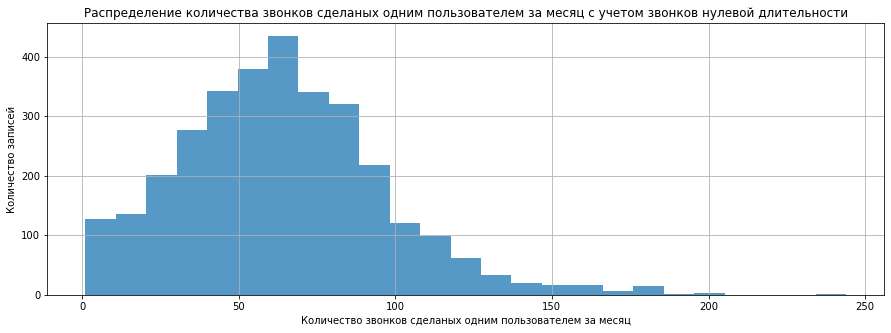

In [41]:
(calls_pivot['calls_count_with_zero'].hist(bins=25, figsize=(15, 5), alpha = 0.75)
 .set(xlabel='Количество звонков сделаных одним пользователем за месяц', 
      ylabel='Количество записей',  
      title='Распределение количества звонков сделаных одним пользователем за месяц с учетом звонков нулевой длительности'));

In [42]:
calls_pivot['calls_count_with_zero'].describe()

count    3174.000000
mean       63.833333
std        32.678036
min         1.000000
25%        41.000000
50%        63.000000
75%        83.000000
max       244.000000
Name: calls_count_with_zero, dtype: float64

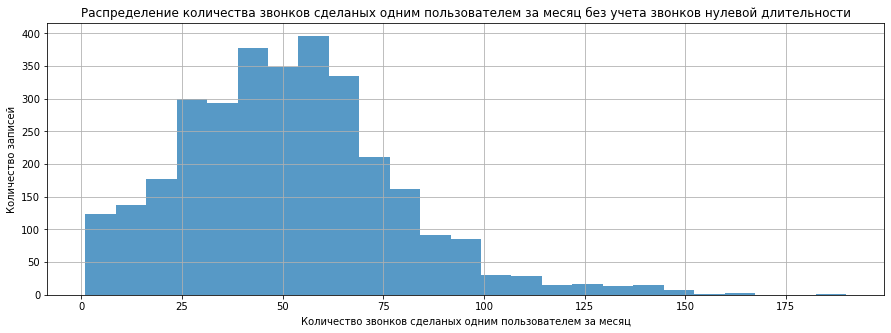

In [43]:
(calls_pivot['calls_count_without_zero'].hist(bins=25, figsize=(15, 5), alpha = 0.75)
 .set(xlabel='Количество звонков сделаных одним пользователем за месяц', 
      ylabel='Количество записей',  
      title='Распределение количества звонков сделаных одним пользователем за месяц без учета звонков нулевой длительности'));

In [44]:
calls_pivot['calls_count_without_zero'].describe()

count    3168.000000
mean       51.450126
std        26.439188
min         1.000000
25%        33.000000
50%        50.000000
75%        67.000000
max       190.000000
Name: calls_count_without_zero, dtype: float64

В среднем пользователь в месяц совершает 51 разговор и еще 13 звонков (64-51) остаются без ответа. Посмотрим на гистограмму длительностей разговора 

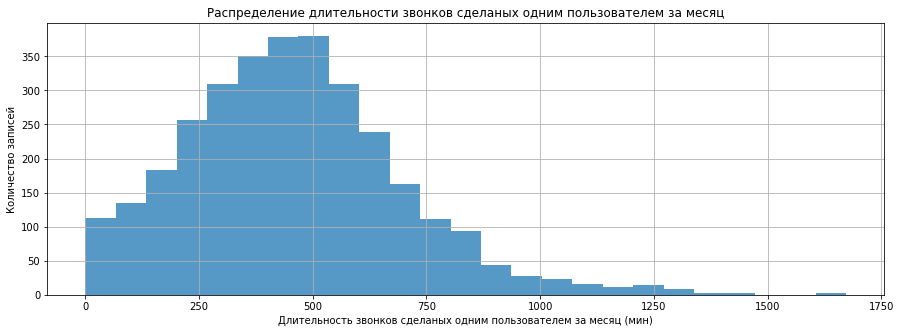

In [45]:
(calls_pivot['calls_sum'].hist(bins=25, figsize=(15, 5), alpha = 0.75)
 .set(xlabel='Длительность звонков сделаных одним пользователем за месяц (мин)', 
      ylabel='Количество записей',  
      title='Распределение длительности звонков сделаных одним пользователем за месяц'));

In [46]:
calls_pivot['calls_sum'].describe()

count    3174.000000
mean      456.931632
std       238.031270
min         0.000000
25%       290.000000
50%       447.000000
75%       592.000000
max      1673.000000
Name: calls_sum, dtype: float64

В среднем пользователи тратят 457 минут (порядка 8 ч) в месяц на разговоры

* количество отправленных сообщений по месяцам

In [47]:
messages['month'] = messages['message_date'].dt.month
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [48]:
messages_pivot = messages.groupby(['user_id', 'month'])['id'].agg(['count'])
messages_pivot.columns = ['message_counts']
messages_pivot.head(10)

message_counts
user_id month                
1000    5                  22
        6                  60
        7                  75
        8                  81
        9                  57
        10                 73
        11                 58
        12                 70
1002    6                   4
        7                  11

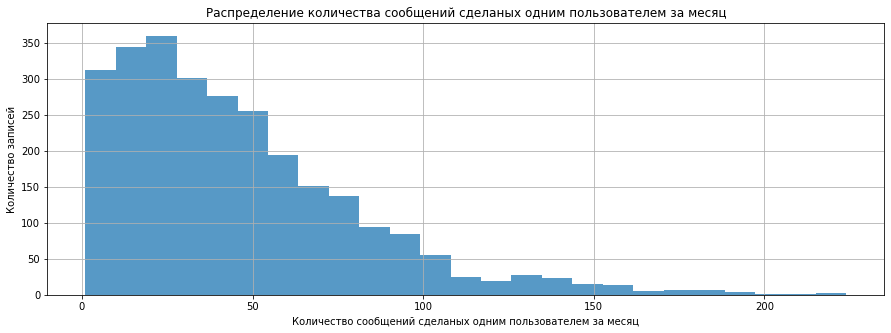

In [49]:
(messages_pivot['message_counts'].hist(bins=25, figsize=(15, 5), alpha = 0.75)
 .set(xlabel='Количество сообщений сделаных одним пользователем за месяц', 
      ylabel='Количество записей',  
      title='Распределение количества сообщений сделаных одним пользователем за месяц'));

In [50]:
messages_pivot['message_counts'].describe()

count    2717.000000
mean       45.283769
std        35.051363
min         1.000000
25%        19.000000
50%        38.000000
75%        63.000000
max       224.000000
Name: message_counts, dtype: float64

В среднем один пользователь отправляет 45 сообщений в месяц

* объем израсходованного интернет-трафика по месяцам

In [51]:
internet['month'] = internet['session_date'].dt.month
internet.head()

,id,mb_used,session_date,user_id,month
0,1000_0,112.949997,2018-11-25,1000,11
1,1000_1,1052.810059,2018-09-07,1000,9
2,1000_2,1197.260010,2018-06-25,1000,6
3,1000_3,550.270020,2018-08-22,1000,8
4,1000_4,302.559998,2018-09-24,1000,9


Так как «Мегалайн» всегда округляет вверх значения мегабайт, то округлим значения в столбце mb_used вверх до целых

In [52]:
internet['mb_used'] = np.ceil(internet['mb_used']).astype('int32')
internet['mb_used'].head(10)

0     113
1    1053
2    1198
3     551
4     303
5     400
6     541
7     416
8     506
9     346
Name: mb_used, dtype: int32

In [53]:
internet_pivot = internet.groupby(['user_id', 'month'])['mb_used'].agg(['sum', 'count', 'mean'])
internet_pivot.columns = ['mb_used_sum', 'internet_sessions_count', 'mb_used_mean']
internet_pivot.head(10)

mb_used_sum  internet_sessions_count  mb_used_mean
user_id month                                                    
1000    5             2256                        5    451.200000
        6            23257                       49    474.632653
        7            14016                       29    483.310345
        8            14070                       29    485.172414
        9            14581                       27    540.037037
        10           14717                       27    545.074074
        11           14768                       24    615.333333
        12            9827                       21    467.952381
1001    11           18452                       55    335.490909
        12           14053                       41    342.756098

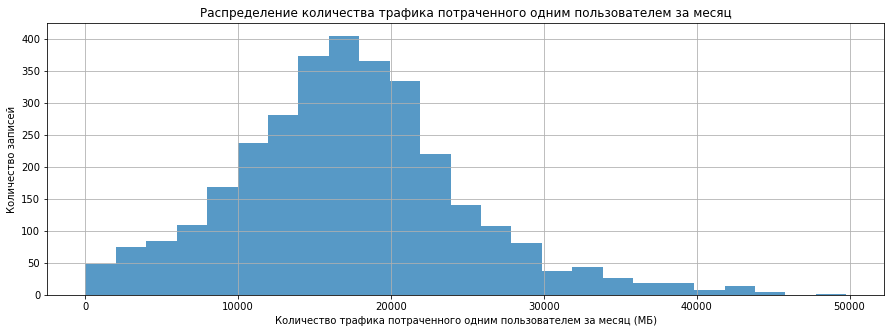

In [54]:
(internet_pivot['mb_used_sum'].hist(bins=25, figsize=(15, 5), alpha = 0.75)
 .set(xlabel='Количество трафика потраченного одним пользователем за месяц (МБ)', 
      ylabel='Количество записей',  
      title='Распределение количества трафика потраченного одним пользователем за месяц'));

In [55]:
internet_pivot['mb_used_sum'].describe()

count     3203.000000
mean     17286.749610
std       7523.580332
min          0.000000
25%      12543.000000
50%      16985.000000
75%      21455.500000
max      49789.000000
Name: mb_used_sum, dtype: float64

В среднем каждый пользователь потребляет порядка 17 ГБ трафика в месяц.

* рассчет помесячной выручки с каждого пользователя.

Для того чтобы рассчитать помесячную выручку с каждого пользователя объединим все таблицы в единый дата фрейм, после чего добавим в объединенный дата фрейм столбцы в которых содержится превышение пользователем выделенных для его тарифа минут, сообщений и трафика и в заключении рассчитаем доход который приносит пользователь в соответствующем месяце, как сумма которую он платит за тариф и за превышение выделенных ему в рамках тарифа ресурсов

In [56]:
df = calls_pivot.copy()
df = df.join(messages_pivot).join(internet_pivot).reset_index().merge(users, on='user_id').merge(tariffs, on='tariff_name')
df.head(10)

,user_id,month,calls_sum,calls_count_with_zero,calls_mean_with_zero,calls_count_without_zero,calls_mean_without_zero,message_counts,mb_used_sum,internet_sessions_count,...,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159,22,7.227273,17.0,9.352941,22.0,2256.0,5.0,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172,43,4.000000,28.0,6.142857,60.0,23257.0,49.0,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340,47,7.234043,41.0,8.292683,75.0,14016.0,29.0,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408,52,7.846154,42.0,9.714286,81.0,14070.0,29.0,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466,58,8.034483,46.0,10.130435,57.0,14581.0,27.0,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
5,1000,10,350,57,6.140351,44.0,7.954545,73.0,14717.0,27.0,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
6,1000,11,338,43,7.860465,37.0,9.135135,58.0,14768.0,24.0,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
7,1000,12,333,46,7.239130,38.0,8.763158,70.0,9827.0,21.0,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
8,1003,8,380,55,6.909091,43.0,8.837209,37.0,8571.0,15.0,...,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1
9,1003,9,961,134,7.171642,105.0,9.152381,91.0,12479.0,22.0,...,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1


In [57]:
# функция рассчитывает превышение пользователем выделенных ему минут в тарифе
def out_of_tariff_minutes_calc(data):
    if data['calls_sum'] > data['minutes_included']:
        return data['calls_sum'] - data['minutes_included']
    else:
        return 0

In [58]:
df['out_of_tariff_minutes'] = df.apply(out_of_tariff_minutes_calc, axis=1)
df['out_of_tariff_minutes'].describe()

count    3174.000000
mean       29.218336
std        73.464047
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       935.000000
Name: out_of_tariff_minutes, dtype: float64

В большинстве случаев пользователи не превышают количетво выделенных им в тарифе минут, однако те кто превышают делают это в cреднем на 29 минут.

In [59]:
# функция рассчитывает превышение пользователем выделенных ему сообщений в тарифе
def out_of_tariff_messages_calc(data):
    if data['message_counts'] > data['messages_included']:
        return data['message_counts'] - data['messages_included']
    else:
        return 0

In [60]:
df['out_of_tariff_messages'] = df.apply(out_of_tariff_messages_calc, axis=1)
df['out_of_tariff_messages'].describe()

count    3174.000000
mean        4.073094
std        11.572311
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        93.000000
Name: out_of_tariff_messages, dtype: float64

Опять же в большинстве случаев пользователи не превышают число выделенных им сообщений, а те кто превышают делают это в среднем на 4 сообщения

In [61]:
# функция рассчитывает превышение пользователем выделенного ему трафика
def out_of_tariff_mb_calc(data):
    if data['mb_used_sum'] > data['mb_per_month_included']:
        return data['mb_used_sum'] - data['mb_per_month_included']
    else:
        return 0

In [62]:
df['out_of_tariff_mb'] = df.apply(out_of_tariff_mb_calc, axis=1)
df['out_of_tariff_mb'].describe()

count     3174.000000
mean      2170.484877
std       3430.645335
min          0.000000
25%          0.000000
50%          0.000000
75%       3608.750000
max      23250.000000
Name: out_of_tariff_mb, dtype: float64

Людей которые превышают размер выделенного им трафика гораздо больше чем людей превышающих выделенное количество минут или сообщений (75% квантиль не нулевой в отличии от предыдущих случаев) и делают они это в среднем на 2 ГБ.

In [63]:
# функция рассчитывает общий доход от пользователя за месяц
def user_income_calc(data):
    user_income = (data['out_of_tariff_minutes'] * data['rub_per_minute'] +
                  data['out_of_tariff_messages'] * data['rub_per_message'] +
                  np.ceil(data['out_of_tariff_mb'] / 1024) * data['rub_per_gb'] +
                  data['rub_monthly_fee'])
    return user_income

In [64]:
df['user_income'] = df.apply(user_income_calc, axis=1)
df['user_income'].describe()

count    3174.000000
mean     1528.182420
std       801.873337
min       550.000000
25%       750.000000
50%      1638.500000
75%      1950.000000
max      6770.000000
Name: user_income, dtype: float64

В среднем один пользователь в представленной выборке приносит 1528 руб в месяц.

### Оценка поведения клиентов оператора исходя из выборки
#### Оценка длительности разговора
Гистограмма распределения длительности звонков сделаных одним пользователем за месяц приведена выше. Распределение близко к нормальному распределению. Оценим среднюю длительность, СКО и дисперсию распределения

In [65]:
calls_pivot['calls_sum'].agg(['mean', 'std', 'var'])

mean      456.931632
std       238.031270
var     56658.885649
Name: calls_sum, dtype: float64

В среднем разговор длится 457 минут. Порядка 95% разговоров укладывается в диапазон от 0 до 933 минут (mean+2\*std)

#### Оценка количества сообщений
Гистограмма распределения количества сообщений сделаных одним пользователем за месяц приведена выше. Распределение является скошенным. Оценим среднее количество отправленных сообщений, СКО и дисперсию распределения

In [66]:
messages_pivot['message_counts'].agg(['mean', 'std', 'var'])

mean      45.283769
std       35.051363
var     1228.598017
Name: message_counts, dtype: float64

В среднем пользователь отправляет 45 сообщений в месяц. Большинство пользователей отправляют не более 115 сообщений в месяц (mean+2*std)

#### Оценка объема интернет-трафика
Гистограмма распределения количества трафика потраченного одним пользователем за месяц приведена выше. Распределение близко к нормальному. Оценим среднюю величину потребляемого трафика, СКО и дисперсию распределения

In [67]:
internet_pivot['mb_used_sum'].agg(['mean', 'std', 'var'])

mean    1.728675e+04
std     7.523580e+03
var     5.660426e+07
Name: mb_used_sum, dtype: float64

В среднем пользователь потребляет 17 ГБ трафика в месяц. Порядка 95% пользователей в месяц потребляют от 2 ГБ (mean-2\*std) до 32 ГБ (mean+2\*std)

<a id='section4'> </a>

## Шаг 4. Проверьте гипотезы
### Проверим различается ли средняя выручка пользователей тарифов «Ультра» и «Смарт»
Построим гистограммы месячной доходности пользователей отдельно для тарифов "смарт" и "ультра"

In [68]:
user_income_by_smart_tariff = df[df['tariff_name']=='smart']['user_income']
user_income_by_ultra_tariff = df[df['tariff_name']=='ultra']['user_income']

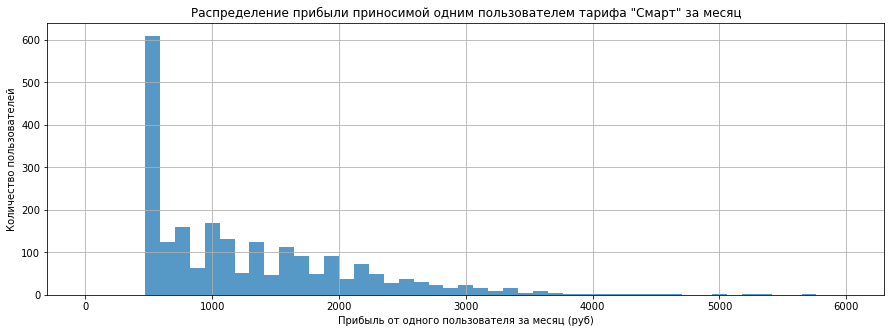

In [69]:
(user_income_by_smart_tariff.hist(bins=51, range=(0, 6000), figsize=(15, 5), alpha=0.75)
 .set(xlabel='Прибыль от одного пользователя за месяц (руб)', 
      ylabel='Количество пользователей',  
      title='Распределение прибыли приносимой одним пользователем тарифа "Смарт" за месяц'));

In [70]:
user_income_by_smart_tariff.describe()

count    2223.000000
mean     1295.569501
std       821.648034
min       550.000000
25%       550.000000
50%      1039.000000
75%      1750.000000
max      6770.000000
Name: user_income, dtype: float64

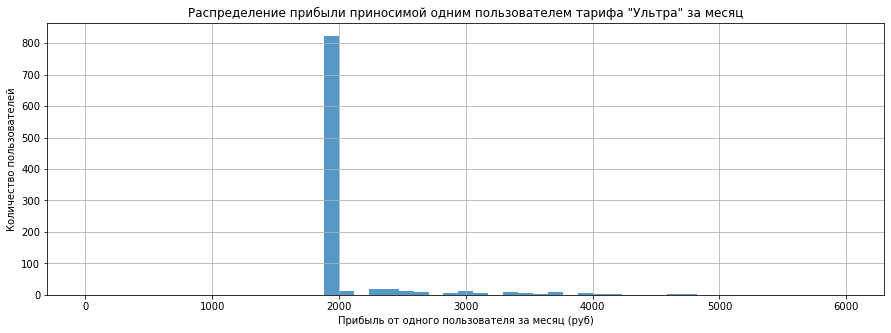

In [71]:
(user_income_by_ultra_tariff.hist(bins=51, range=(0, 6000) , figsize=(15, 5), alpha=0.75)
 .set(xlabel='Прибыль от одного пользователя за месяц (руб)', 
      ylabel='Количество пользователей',  
      title='Распределение прибыли приносимой одним пользователем тарифа "Ультра" за месяц'));

In [72]:
user_income_by_ultra_tariff.describe()

count     951.000000
mean     2071.924290
std       382.106872
min      1950.000000
25%      1950.000000
50%      1950.000000
75%      1950.000000
max      4800.000000
Name: user_income, dtype: float64

Средняя выручка пользователей тарифа "Смарт" по выборке в 1,6 раза ниже средней выручки пользователей тарифа "Ультра" (1295 руб против 2072 руб). При этом суммарное количество месяцев в выборке которым пользуются тарифом "Смарт" более чем в два раза выше чем аналогичный параметр у второго тарифа (2223 против 951).
Для того чтобы убедится в том что такие результаты могут быть достоверными проведем t-тест. В качестве нулевой гипотезы примем, что доходы от пользователей обоих тарифов равны, альтернативная же гипотеза заключается в том что пользователи одного из тарифов приносят большую выручку.

In [73]:
from scipy import stats as st

alpha = 0.05

results = st.ttest_ind(user_income_by_smart_tariff, user_income_by_ultra_tariff, equal_var = False)

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Гипотеза о равенстве средних выручек двух тарифов отвергнута')
else:
    print('Не получилось отвергнуть гипотезу о равенстве средних выручек двух тарифов')

p-значение:  1.8405224159827356e-241
Гипотеза о равенстве средних выручек двух тарифов отвергнута


Таким образом, учитывая что средний доход от пользователей тарифа "Ультра" выше, можно сделать вывод, что привлечение пользователей на данный тариф принесет большую выручку.

### Проверим различается ли средняя выручка пользователей из Москвы от выручки пользователей из других регионов
Построим гистограммы месячной доходности пользователей отдельно для Москвы и остальных регионов

In [74]:
user_income_in_moscow = df[df['city']=='Москва']['user_income']
user_income_in_other_cities = df[df['city']!='Москва']['user_income']

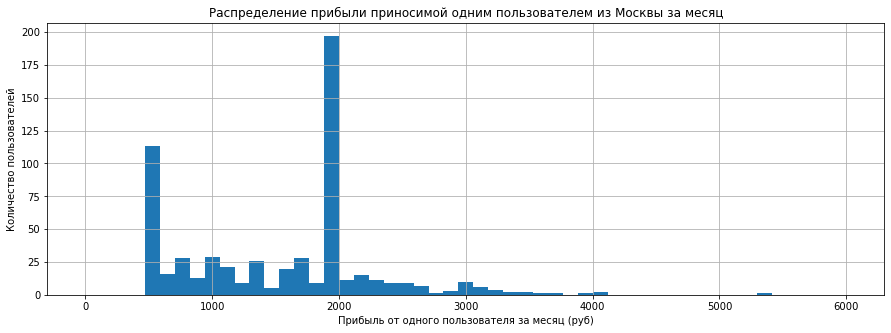

In [75]:
(user_income_in_moscow.hist(bins=51, range=(0, 6000) , figsize=(15, 5))
 .set(xlabel='Прибыль от одного пользователя за месяц (руб)', 
      ylabel='Количество пользователей',  
      title='Распределение прибыли приносимой одним пользователем из Москвы за месяц'));

In [76]:
user_income_in_moscow.describe()

count     610.000000
mean     1550.150820
std       752.894829
min       550.000000
25%       798.000000
50%      1750.000000
75%      1950.000000
max      5321.000000
Name: user_income, dtype: float64

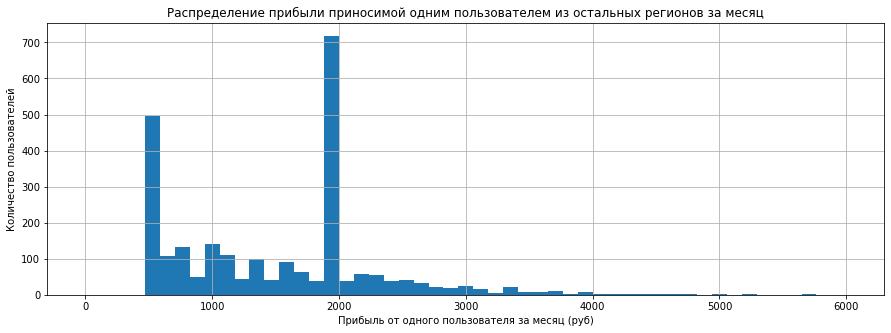

In [77]:
(user_income_in_other_cities.hist(bins=51, range=(0, 6000) , figsize=(15, 5))
 .set(xlabel='Прибыль от одного пользователя за месяц (руб)', 
      ylabel='Количество пользователей',  
      title='Распределение прибыли приносимой одним пользователем из остальных регионов за месяц'));

In [78]:
user_income_in_other_cities.describe()

count    2564.000000
mean     1522.955928
std       813.144365
min       550.000000
25%       750.000000
50%      1557.500000
75%      1950.000000
max      6770.000000
Name: user_income, dtype: float64

Средняя выручка в месяц приходящаяся на одного пользователя из Москвы составляет 1550 руб. Пользователь из регионов приносит в среднем сопоставимую сумму - 1523 руб в месяц. Проверим гипотезу о равенстве выручек от пользователей в Москве и в регионах (нулевая гипотеза). Альтернативная гипотеза состоит в том что выручки от пользователей а Москве и регионах не одинаковые

In [79]:
alpha = 0.05

results = st.ttest_ind(user_income_in_moscow, user_income_in_other_cities, equal_var = True)

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Гипотеза о равенстве средних выручек в Москве и других регионах отвергнута')
else:
    print('Не получилось отвергнуть гипотезу о равенстве средних выручек в Москве и других регионах')

p-значение:  0.4516335152984994
Не получилось отвергнуть гипотезу о равенстве средних выручек в Москве и других регионах


То, что пользователи в Москве и в других регионах могут приносить оператору одинаковую выручку - вероятно.

<a id='section5'> </a>

## Шаг 5. Общий вывод

**В процессе данного исследования были проведены следующие работы:**
1. Проведен обзор предоставленных данных, изучена общая информация
2. Проведена подготовка данных, заменены типы данных
3. Оценено количество сделанных звонков и израсходованных минут разговора пользователей по месяцам, количество отправленных сообщений по месяцам, объем израсходованного интернет-трафика по месяцам, месячная выручка с каждого пользователя.
4. Проверены гипотезы о том что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается и о том что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

**По результатам исследования установлено:**
* В среднем пользователи тратят 457 минут (порядка 8 ч) в месяц на разговоры, при этом средняя продолжительность разговора в выборке составляет - 8,4 мин. Средний пользователь в месяц совершает 51 разговор и еще 13 звонков остаются без ответа.
* В среднем один пользователь отправляет 45 сообщений в месяц
* В среднем каждый пользователь потребляет порядка 17 ГБ трафика в месяц, средний потребляемый за сессию трафик составляет 426 МБ
* Людей которые превышают размер выделенного им трафика гораздо больше чем людей превышающих выделенное количество минут или сообщений и делают они это в среднем на 2 ГБ.
* Один средний пользователь в представленной выборке приносит 1528 руб в месяц.
* Средняя выручка пользователей тарифа "Смарт" по выборке в 1,6 раза ниже средней выручки пользователей тарифа "Ультра" (1295 руб против 2072 руб).
* Гипотеза о том что средняя выручка пользователей тарифов «Ультра» и «Смарт» одинакова отвергнута. Средняя выручка отличается.
* Средняя выручка в месяц приходящаяся на одного пользователя в выборке из Москвы составляет 1550 руб. 
* Пользователь из регионов приносит в среднем - 1523 руб в месяц.
* То, что пользователи в Москве и в других регионах могут приносить оператору одинаковую выручку - вероятно.


**Рекомендации:**
* Учитывая что средний доход от пользователей тарифа "Ультра" выше, а количество пользователей меньше, рекомендуется проработать возможность увеличения количества пользователей привлекаемых на данный тариф.